<a href="https://colab.research.google.com/github/Oyekanmi/Coursera_Capstone/blob/master/ARIMA_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime


In [5]:
#Convert the month column from 'string' to datetime 
# define a parser fxtn 
def parser(x):
    return datetime.strptime(x, '%Y-%m')

In [7]:
# REDUNDANT CELL : Just included for explanation
# Also use date column as index by passing parameter , index_col=0
#Use parse_date to tell the date colum position
Car_Sales = pd.read_csv("sales-cars.csv",index_col=0, parse_dates=[0],date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


In [8]:
# Print the first five rows
Car_Sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


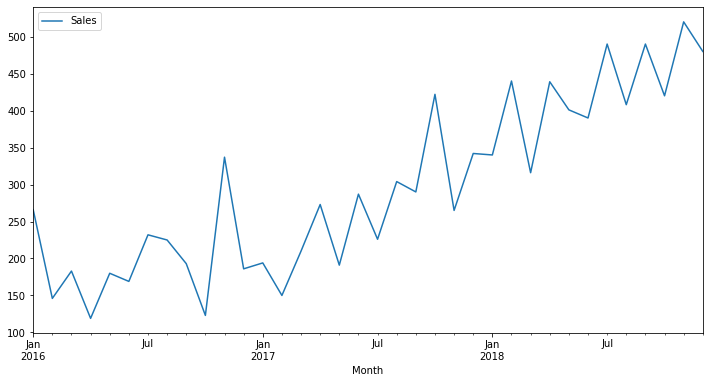

In [10]:
# plot the data
Car_Sales.plot(figsize= (12,6))

## Is the Series Stationary ? How do we test for stationarity ?

### We can test using the ACF plot : Autocorrelation fuction plot

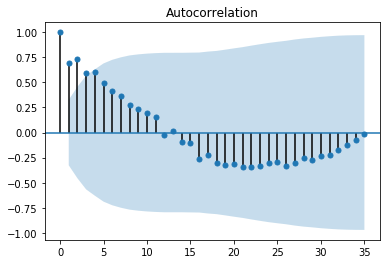

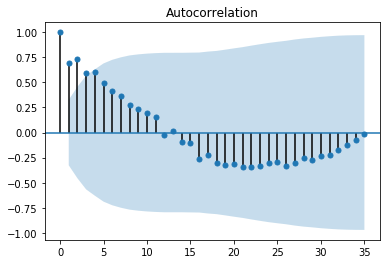

In [ ]:
#import library
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Car_Sales)

In [ ]:
# Result shows that the correlation between the series over a period of time changes i.e. not stationary
# For example, the line on 1 represent the correlation between 'Car_Sales' and 'Car_Sales.shift(1) i.e. Shifted by 1 or 1 time lag'

In [ ]:
# Check the stationarity of the data i.e check if the mean, variance or covariance is constant over time
# We can see that the mean increases over time meaning that it is not stationary 
# Converting series to stationary
# Tae a difference of the series
Car_Sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [ ]:
# find the One time period difference or integrated of Order 1, typically denoted by d one of the parameter of ARIMA model
Car_Sales_diff = Car_Sales.diff(periods=1)
Car_Sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [ ]:
# Remove the NaN under Sales
Car_Sales_diff= Car_Sales_diff[1:]
Car_Sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


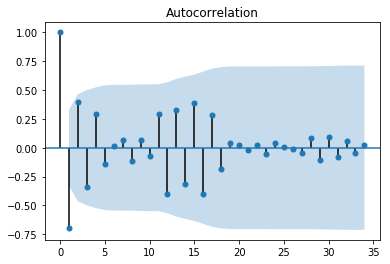

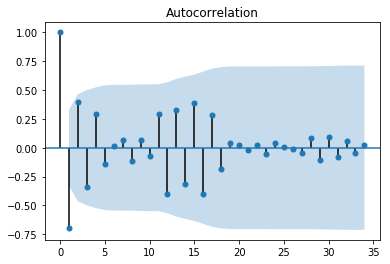

In [ ]:
# Let's check if the difference function is stationary using the autocorrelation plot
plot_acf(Car_Sales_diff)

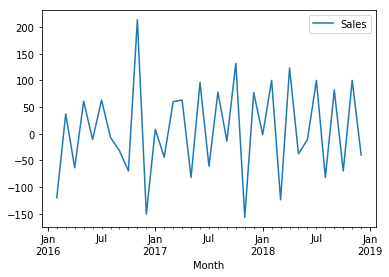

In [ ]:
# We can see that the series is stationary. We can plot the 'Car_Sales_diff' series data to visulaize the series
Car_Sales_diff.plot()

In [ ]:
# Divide the data into training and testing data
X = Car_Sales.values
X.size

36

In [ ]:
# Since we have 36 dataset, let's use 80% as train and 20% as test 
# 80% is 27 , 20% is 9
train = X[0:27]
test= X[27:]
predictions=[]
print (' we have' ,train.size,'training dataset and ',test.size,' testing dataset')

 we have 27 training dataset and  9  testing dataset


### Autoregression AR Model

In [ ]:
#import autoregression fxtn
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
#Fit model
model_ar_fit = model_ar.fit()

In [ ]:
# predicted sales 
predictions = model_ar_fit.predict(start=27, end=36)

In [ ]:
#Actual sales
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

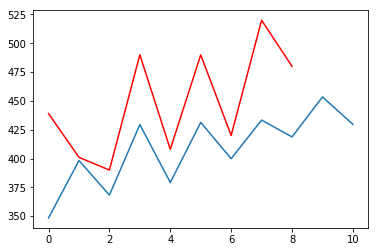

In [ ]:
# Plot values to visualize and compare the two data
plt.plot(predictions)
plt.plot(test, color ='red')

### ARIMA model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#Train the model
#Specify parameters p, d & q : p-periods taken for autoregressive model
# d - integration order and q - periods in moving average model
Model_Arima = ARIMA(train, order=(3,1,0))
# Fit the model
Model_Arima_fit = Model_Arima.fit()
print(Model_Arima_fit.aic)

294.854358421861


In [ ]:
# Make predictions
Predictions= Model_Arima_fit.forecast(steps=9)[0] # steps =9 means we want to predict 9 values Note: We use forecast in ARIMA
Predictions


array([393.12492251, 367.08451761, 432.19170447, 370.18118463,
       424.07802656, 400.33344669, 444.76777064, 412.5415241 ,
       450.35924021])

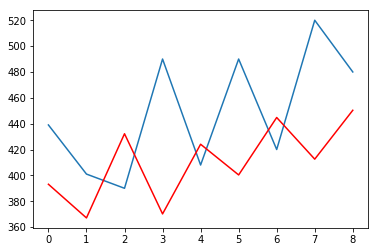

In [ ]:
# Plot the forecated values versus the actual values 
plt.plot(test)
plt.plot(Predictions, color='red')

In [ ]:
#Calculate the mean_squared_error
mean_squared_error(test,Predictions)

4525.48955425146

In [ ]:
# How do we find the best fit parameters?
# We use the AIC method : We need to use the model with the minimum AIC values , we can change the parameters in the ARIMA model
# Alternatively,
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        Model_Arima = ARIMA(train, order=param)
        # Fit the model
        Model_Arima_fit = Model_Arima.fit()
        print(param,Model_Arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.16687175343054
(1, 0, 2) 310.97906422264316
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112584986
(1, 1, 2) 299.4716667063295
(1, 1, 3) 301.28511809477334
(1, 1, 4) 299.97873239729927
(1, 2, 0) 306.5307767571543
(2, 0, 0) 310.99695736763897
(2, 1, 0) 300.2089561239962
(2, 1, 1) 297.99999301674126
(2, 1, 2) 298.55054281302256
(2, 1, 3) 302.87208243829116
(2, 2, 0) 306.2975856432374
(3, 0, 0) 312.98385874204837
(3, 1, 0) 294.854358421861
(3, 1, 1) 295.99793534183914
(3, 1, 2) 292.6686238693939
(3, 1, 3) 294.65889075168616
(3, 2, 0) 299.407586815627
(3, 2, 4) 291.275046839692
(4, 0, 0) 311.07065620727724
(4, 0, 1) 321.48502440112645
(4, 1, 0) 295.93436313516304
(4, 1, 1) 297.90988170603566
(4, 1, 2) 294.66336

In [ ]:
# The mimimum combination is the (4,2,1)-291.39913447173916. We can use the paramter to find the optimized model